In [2]:
import os
import ipywidgets.widgets as wgt
import pyfas as fa
import pandas as pd

---

<i><H4>Survival miniguide</H4></i>

<i><H7>To run a cell press:</H7></i>
> SHIFT+ENTER  

<i><H7>To insert an empty cell press</H7></i>
> b (to insert below)  
> a (to insert above) 

If you are interested in a specific cell/commnad (i.e. the <i>to_excel</i> feature) previous cells must be exceuted! You can also run all the cells from the toolbar above (Cell --> Run All)

---

# Tpl files, examples and howto

For an tpl file the following methods are available:

* <b>filter_trends</b> - return a filtered subset of trends
* <b>extract</b> - extract a single trend variable
* <b>to_excel</b> - dump all the data to an excel file

The workflow should be:

1. Load the correct tpl
2. Filter the desired variable(s)
3. Extract the selected variable(s) or dump all the variables to an excel file

---

## File loading

For these example the file FC1_rev01.tpl will be loaded. Another file can be loaded modifying the path and the filename value in the text areas below. 

In [21]:
# Path text widget
path_wdt = wgt.Text(description="Path", value="../pyfas/test" )
path_wdt

To change the working folder is also possible to use the command 
> cd your\working\folder\path\

In [22]:
# Filename text widget
fname_wdt = wgt.Text(description="Filename", value=r"FC1_rev01.tpl" )
fname_wdt

In [23]:
path = path_wdt.value
fobj = fname_wdt.value
tpl = fa.Tpl(path + os.sep + fobj)

---

## Trend selection

Now let's filter the avaialbe trends looking for all the recorded pressures:

In [24]:
# Variable text widget
var_wdt = wgt.Text(description="Variable", value="PT" )
var_wdt

In [25]:
tpl.filter_trends(var_wdt.value)

{3: "PT 'POSITION:' 'TIEIN' '(PA)' 'Pressure'\n",
 11: "PT 'POSITION:' 'RISER_BASE' '(PA)' 'Pressure'\n",
 18: "PT 'POSITION:' 'RISER_TOP' '(PA)' 'Pressure'\n",
 26: "PT 'POSITION:' 'INLET' '(PA)' 'Pressure'\n",
 34: "PT 'POSITION:' 'VENT_LINE' '(PA)' 'Pressure'\n",
 44: "PT 'POSITION:' 'US_PCV20051' '(PA)' 'Pressure'\n",
 51: "PT 'POSITION:' 'DS_PCV20051' '(PA)' 'Pressure'\n",
 65: "PT 'POSITION:' 'SPOOLIN' '(PA)' 'Pressure'\n",
 72: "PT 'POSITION:' 'US_SSIV' '(PA)' 'Pressure'\n",
 79: "PT 'POSITION:' 'DS_SSIV' '(PA)' 'Pressure'\n"}

Just a bit nicer:

In [26]:
pd.DataFrame(tpl.filter_trends(var_wdt.value), index=("Trends",)).T

,Trends
3,PT 'POSITION:' 'TIEIN' '(PA)' 'Pressure'\n
11,PT 'POSITION:' 'RISER_BASE' '(PA)' 'Pressure'\n
18,PT 'POSITION:' 'RISER_TOP' '(PA)' 'Pressure'\n
26,PT 'POSITION:' 'INLET' '(PA)' 'Pressure'\n
34,PT 'POSITION:' 'VENT_LINE' '(PA)' 'Pressure'\n
44,PT 'POSITION:' 'US_PCV20051' '(PA)' 'Pressure'\n
51,PT 'POSITION:' 'DS_PCV20051' '(PA)' 'Pressure'\n
65,PT 'POSITION:' 'SPOOLIN' '(PA)' 'Pressure'\n
72,PT 'POSITION:' 'US_SSIV' '(PA)' 'Pressure'\n
79,PT 'POSITION:' 'DS_SSIV' '(PA)' 'Pressure'\n


---

## Dump to excel

If no path filemane or path is provided, an excel file called "data.xlsx" will be created in the working folder. Depending on the tpl size this may take a while.

In [27]:
# Excel fname
xl_fname_wdt = wgt.Text(description="Excel fname", value="" )
xl_fname_wdt

In [28]:
# Excel path
xl_path_wdt = wgt.Text(description="Excel path", value="" )
xl_path_wdt

Click on the button below to geenrate the excel file

In [29]:
# Excel fname
xl_button_wdt = wgt.Button(description="To Excel", value=False)

def on_button_clicked(b):
    #tpl.to_excel(xl_fname_wdt.value, xl_path_wdt.value)
    tpl.to_excel()
    print("Completed.")

xl_button_wdt.on_click(on_button_clicked)
xl_button_wdt

---

## Extract a specific variable

> N.B. This section of the notebook does not use widgets, thus some python knowledge is required to change tpl and or variables to be plotted.

Once you know the variable(s) index you are interested in (see the filtering paragraph above for more info) you can also extract it (or them) and use the data directly in the notebook. To postporcess here the results some python knowlwedge is required. 

Let's assume you are interested in the inlet pressure and the outlet temperature:

In [30]:
pd.DataFrame(tpl.filter_trends("TM"), index=("Trends",)).T

,Trends
4,TM 'POSITION:' 'TIEIN' '(C)' 'Fluid temperatur...
12,TM 'POSITION:' 'RISER_BASE' '(C)' 'Fluid tempe...
19,TM 'POSITION:' 'RISER_TOP' '(C)' 'Fluid temper...
27,TM 'POSITION:' 'INLET' '(C)' 'Fluid temperatur...
35,TM 'POSITION:' 'VENT_LINE' '(C)' 'Fluid temper...
45,TM 'POSITION:' 'US_PCV20051' '(C)' 'Fluid temp...
52,TM 'POSITION:' 'DS_PCV20051' '(C)' 'Fluid temp...
66,TM 'POSITION:' 'SPOOLIN' '(C)' 'Fluid temperat...
73,TM 'POSITION:' 'US_SSIV' '(C)' 'Fluid temperat...
80,TM 'POSITION:' 'DS_SSIV' '(C)' 'Fluid temperat...


In [31]:
pd.DataFrame(tpl.filter_trends("PT"), index=("Trends",)).T

,Trends
3,PT 'POSITION:' 'TIEIN' '(PA)' 'Pressure'\n
11,PT 'POSITION:' 'RISER_BASE' '(PA)' 'Pressure'\n
18,PT 'POSITION:' 'RISER_TOP' '(PA)' 'Pressure'\n
26,PT 'POSITION:' 'INLET' '(PA)' 'Pressure'\n
34,PT 'POSITION:' 'VENT_LINE' '(PA)' 'Pressure'\n
44,PT 'POSITION:' 'US_PCV20051' '(PA)' 'Pressure'\n
51,PT 'POSITION:' 'DS_PCV20051' '(PA)' 'Pressure'\n
65,PT 'POSITION:' 'SPOOLIN' '(PA)' 'Pressure'\n
72,PT 'POSITION:' 'US_SSIV' '(PA)' 'Pressure'\n
79,PT 'POSITION:' 'DS_SSIV' '(PA)' 'Pressure'\n


Our targets are:

> <b>variable 19</b> - TM 'POSITION:' 'RISER_TOP' '(C)' 'Fluid T"  

and  

> <b>variable 26</b> - "PT 'POSITION:' 'INLET' '(PA)' 'Pressure'  

In [32]:
# Extraction
tpl.extract(19)
tpl.extract(26)

Now the tpl attribute "data" contains our data, let's plot it:

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


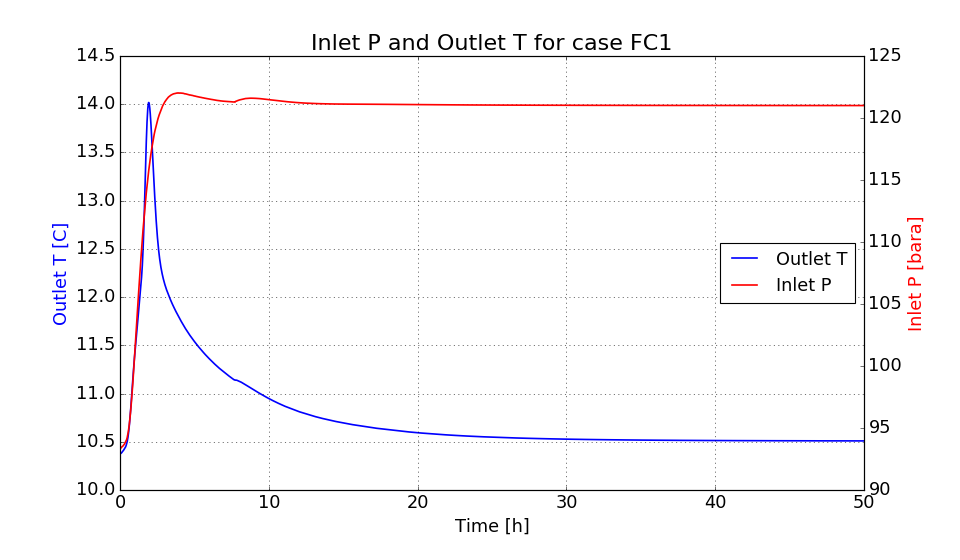

In [33]:
%matplotlib 
fig, ax1 = plt.subplots();
p0, = ax1.plot(tpl.time/3600, tpl.data[19])
ax1.set_ylabel("Outlet T [C]", color="b", fontsize=16)
ax1.set_xlabel("Time [h]", fontsize=16)

ax2 = ax1.twinx()
p1, = ax2.plot(tpl.time/3600, tpl.data[26]/1e5, 'r')
ax2.grid(False)
ax2.set_ylabel("Inlet P [bara]", color="r", fontsize=16)

ax1.tick_params(axis="both", labelsize=16)
ax2.tick_params(axis="both", labelsize=16)

plt.legend((p0, p1), ("Outlet T", "Inlet P"), loc=7)
plt.title("Inlet P and Outlet T for case FC1", size=20)

---